1)Introduction:

1.1)Problem statement:

Dataset contains android apps with their permissions. Classify apps into benign(0) or malware(1).

1.2)Features:

1-App

2-Package

3-category

4-Description

5-Rating

6-Number of ratings

7-Price

8-Related apps

9-Dangerous permission count

10-Safe permission count 

11-Class








2)Importing the libraries: 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from sklearn.metrics import accuracy_score, classification_report


3)Loading the data:


In [2]:
df = pd.read_csv('Android_Permission.csv')


In [3]:
df = df[['App','Package','Category','Description','Rating','Number of ratings','Price','Related apps','Dangerous permissions count','Safe permissions count','Class']]


In [4]:
#Quick view of data
df.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,1




4)Exploratory Data Analysis (EDA):

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1-What question(s) are you trying to solve?

2-What kind of data do we have and how do we treat different types?

3-What's missing from the data and how do you deal with it?

4-Are there any duplicated values in the data and how do you deal with it?

5-Where are the outliers and why should you care about them?

6-How can you add, change or remove features to get more out of your data?




In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   App                          29998 non-null  object 
 1   Package                      29999 non-null  object 
 2   Category                     29999 non-null  object 
 3   Description                  29996 non-null  object 
 4   Rating                       29999 non-null  float64
 5   Number of ratings            29999 non-null  int64  
 6   Price                        29999 non-null  float64
 7   Related apps                 29244 non-null  object 
 8   Dangerous permissions count  29795 non-null  float64
 9   Safe permissions count       29999 non-null  int64  
 10  Class                        29999 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.5+ MB


In [6]:
df.shape

(29999, 11)

In [7]:
#check for missing values
df.isnull().sum()

App                              1
Package                          0
Category                         0
Description                      3
Rating                           0
Number of ratings                0
Price                            0
Related apps                   755
Dangerous permissions count    204
Safe permissions count           0
Class                            0
dtype: int64


-Method to eliminate missing values


In [8]:
df = df.dropna()          

In [9]:
df.isnull().sum()

App                            0
Package                        0
Category                       0
Description                    0
Rating                         0
Number of ratings              0
Price                          0
Related apps                   0
Dangerous permissions count    0
Safe permissions count         0
Class                          0
dtype: int64

-Missing values eliminated

In [10]:
#number of rows,columns
df.shape

(29240, 11)

In [11]:
#check for duplicated values
len (df[df.duplicated()])

2654

-Method to eliminate duplicated values

In [12]:
df.drop_duplicates()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,0
5,Ms Claus Live Wallpaper,tmc.christmaslady.livewallpaper,Personalization,Ms Claus Live Wallpaper<p>Find more Free apps ...,4.5,16,0.00,"{tmc.christmassanta.livewallpaper, tmc.winterh...",3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
29993,FORUM CU Mobile DeposZip,com.Vertifi.DeposZip.P274074037,Finance,Make check deposits to your FORUM Credit Union...,4.8,4,0.00,"{com.forumcu.cuonline, com.msi.bktest, com.qua...",2.0,0,1
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,1


In [13]:
df.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Class
count,29240.000000,2.924000e+04,29240.000000,29240.000000,29240.000000,29240.000000
mean,3.595951,6.935963e+03,0.580069,3.124590,1.368228,0.661047
std,1.356938,4.597257e+04,3.197028,3.068755,1.531416,0.473362
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.400000,5.000000e+00,0.000000,1.000000,0.000000,0.000000
50%,4.000000,5.000000e+01,0.000000,2.000000,1.000000,1.000000
75%,4.400000,7.700000e+02,0.000000,4.000000,2.000000,1.000000
max,5.000000,1.908590e+06,158.070000,30.000000,16.000000,1.000000


-Findings:

1-Big dataset

2-There were duplicates values but it was eliminated

3-There were missing values (null) but it was eliminated

4-Outliers and skewed distribution




In [14]:
df.Class.value_counts()

1    19329
0     9911
Name: Class, dtype: int64

<AxesSubplot:>

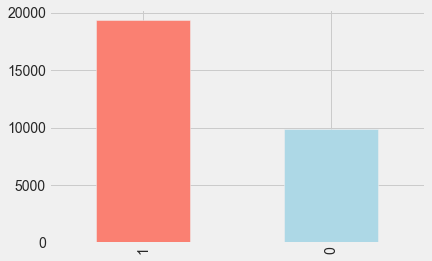

In [15]:
df.Class.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

-We have 19329 malware (1) and 9911 benign(0) , so our problem is not balanced


5)Correlation Matrix:


<AxesSubplot:>

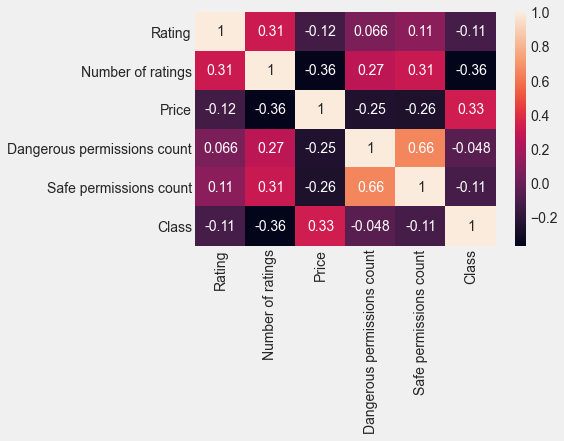

In [16]:
sns.heatmap(df.corr(method='spearman', min_periods=1),annot=True)

-High correlation between two features is an indicator that we can eliminate on of them and that help in reduction
EX:Dangerous permission count due to high correlation with Safe permission count

<AxesSubplot:title={'center':'Correlation with Class'}>

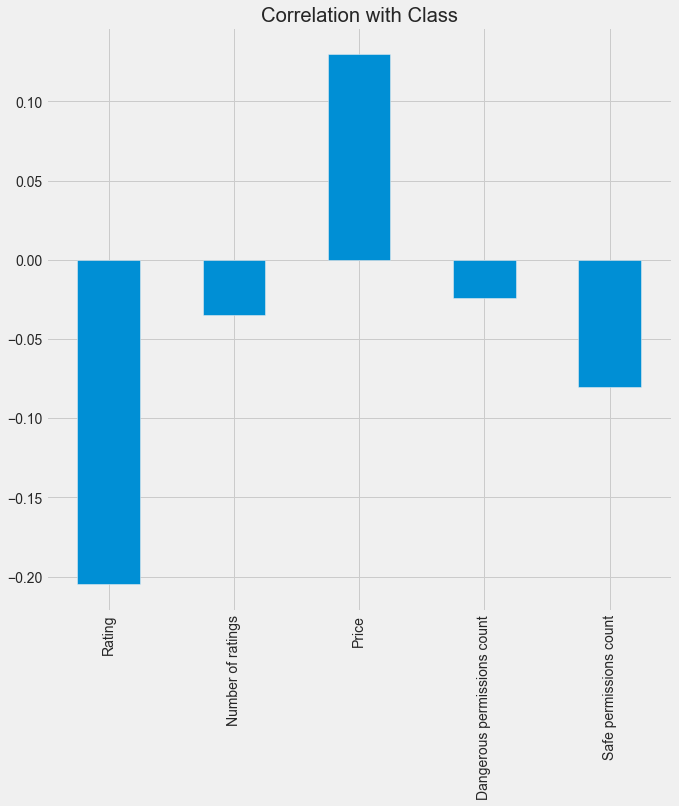

In [17]:
X = df.drop('Class', axis=1)
y = df['Class']
X.corrwith(y).plot(kind='bar', grid=True, figsize=(10, 10), title="Correlation with Class")


-Dangerous permission count and Number of ratings has lowest correlation with class


6)Scaling and PCA:

By scaling we are removing potential bias that the model can have towards features with higher magnitudes.

PCA is used to reduce dimensionality of data.



In [18]:
data = X.copy()
scaled = ['Rating','Number of ratings','Price','Dangerous permissions count','Safe permissions count']
features = data[scaled]
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(features.values)
X_standard = scaler.fit_transform(features.values)
X_standard


array([[-0.3654987 , -0.1491994 , -0.18144332,  1.26288254, -0.24045384],
       [ 0.51886016, -0.1465456 , -0.18144332, -0.0406001 ,  0.41254795],
       [ 0.37146702, -0.14558849, -0.18144332, -0.69234142, -0.24045384],
       ...,
       [ 0.44516359, -0.01816251, -0.18144332,  0.28527056,  1.06554975],
       [-0.14440899, -0.15076558, -0.18144332, -0.0406001 , -0.89345564],
       [-0.43919528, -0.15083084, -0.18144332, -0.0406001 ,  0.41254795]])

In [19]:
pca_model = PCA(n_components = 4)
pca_data_standard = pca_model.fit_transform(X_standard)
pca_data_standard

array([[ 0.55379356,  0.32395915, -0.43708571, -0.37217688],
       [ 0.31653095, -0.38605756, -0.22927554,  0.32027175],
       [-0.57292064, -0.49719391,  0.02496947,  0.25109521],
       ...,
       [ 0.98591932, -0.22075592, -0.31730741,  0.19453395],
       [-0.68712166, -0.13625359, -0.0231555 , -0.13982508],
       [ 0.11855897,  0.20737374, -0.30310118, -0.40092559]])

In [20]:
dataset = pd.DataFrame(data = pca_data_standard, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
dataset['Class'] = y
dataset['Class'].fillna(1,inplace = True)
dataset.head(50)

,PC1,PC2,PC3,PC4,Class
0,0.553794,0.323959,-0.437086,-0.372177,0.0
1,0.316531,-0.386058,-0.229276,0.320272,0.0
2,-0.572921,-0.497194,0.024969,0.251095,0.0
3,-1.279672,-0.419240,0.240032,-0.011585,0.0
4,-0.087504,-0.557193,-0.092867,0.452051,1.0
5,-0.525975,-0.634854,0.045765,0.416229,0.0
6,0.357069,-0.920479,1.139466,0.147415,0.0
7,-0.764046,-0.607406,0.093069,0.371721,0.0
8,-0.094988,-0.441917,0.004051,0.246323,0.0
9,1.286591,-0.135514,-0.069786,0.011559,0.0


7)Applying machine learning algorithms:


In [21]:
from sklearn.model_selection import train_test_split


X = dataset.drop('Class', axis=1)
y = dataset.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20468, 4)
(8772, 4)
(20468,)
(8772,)


Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 4 different machine learning models:

1.Decision Tree Classifier 

2.K-Nearest Neighbours Classifier

3.MLP Classifier

4.Random Forest Classifier

7.1)Decision Tree Classifier:

In [23]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  56.36114911080712
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.33      0.33      0.33      2832
         1.0       0.68      0.67      0.68      5940

    accuracy                           0.56      8772
   macro avg       0.50      0.50      0.50      8772
weighted avg       0.56      0.56      0.56      8772



7.2)K-nearest neighbors:

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  60.145918832649336
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.32      0.22      0.26      2832
         1.0       0.68      0.78      0.73      5940

    accuracy                           0.60      8772
   macro avg       0.50      0.50      0.49      8772
weighted avg       0.56      0.60      0.58      8772



7.3)MLP Classifier:

In [25]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)
pred = mlpc.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  67.70405836753307
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2832
         1.0       0.68      1.00      0.81      5940

    accuracy                           0.68      8772
   macro avg       0.34      0.50      0.40      8772
weighted avg       0.46      0.68      0.55      8772



7.4)Random Forest Classifier:

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfor = RandomForestClassifier()
rfor.fit(X_train, y_train)
pred = rfor.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  58.18513451892385
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.32      0.26      0.29      2832
         1.0       0.68      0.73      0.70      5940

    accuracy                           0.58      8772
   macro avg       0.50      0.50      0.50      8772
weighted avg       0.56      0.58      0.57      8772



-------------------According to the accuracy we conclude that the best algorithm is MLPClassifier---------------------